In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#2.Load Dataset
df = pd.read_csv("C:\\Users\\sathw\\Downloads\\Titanic-Dataset.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
#3. Basic Info
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [4]:
# 4.Data Cleaning 
df['Age'].fillna(df['Age'].median, inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

C:\Users\sathw\AppData\Local\Temp\ipykernel_16844\4244511409.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Age'].fillna(df['Age'].median, inplace=True)
C:\Users\sathw\AppData\Local\Temp\ipykernel_16844\4244511409.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value},

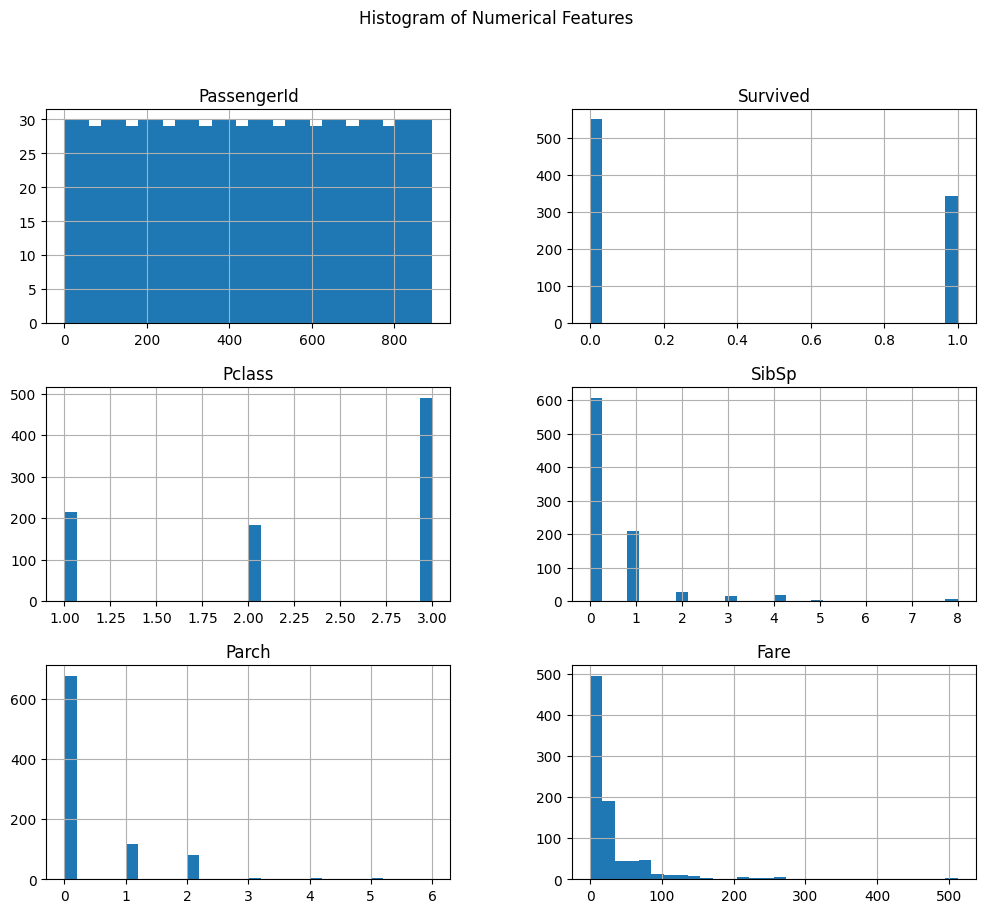

In [5]:
#5.Histograms
df.hist(bins=30, figsize=(12,10))
plt.suptitle("Histogram of Numerical Features")
plt.show()

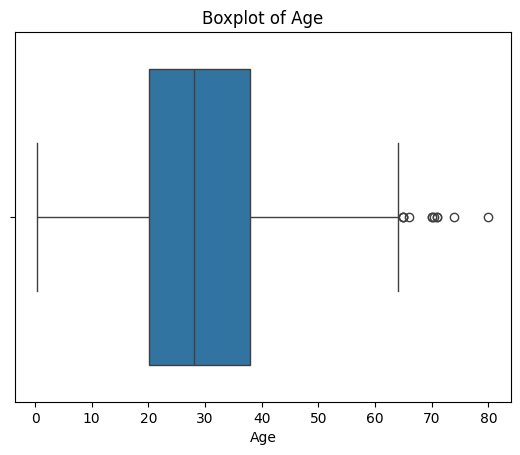

In [6]:
#6.Boxplots
# Force numeric conversion
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows where Age could not be converted
df = df.dropna(subset=['Age'])

#Boxplot
sns.boxplot(x='Age', data=df)
plt.title("Boxplot of Age")
plt.show()


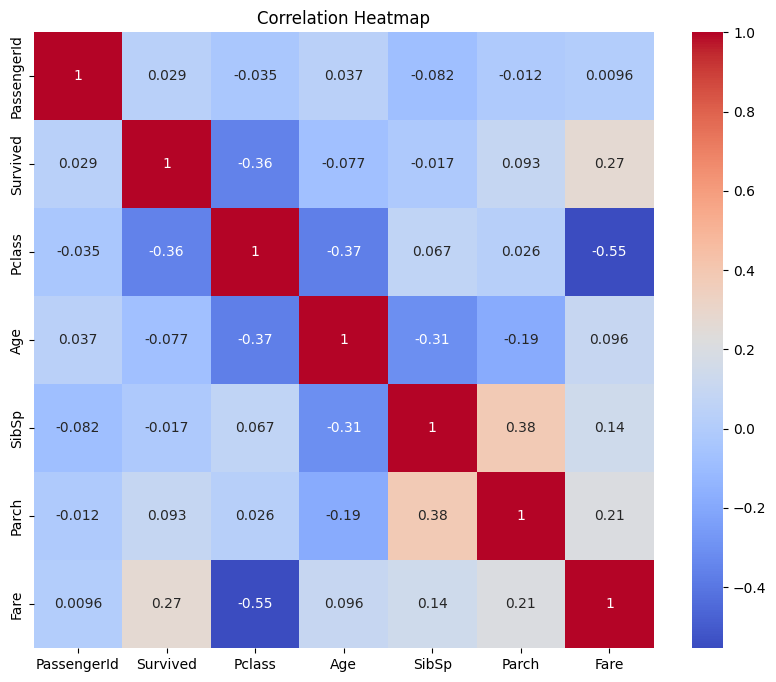

In [7]:
#7.Correlation Matrix
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

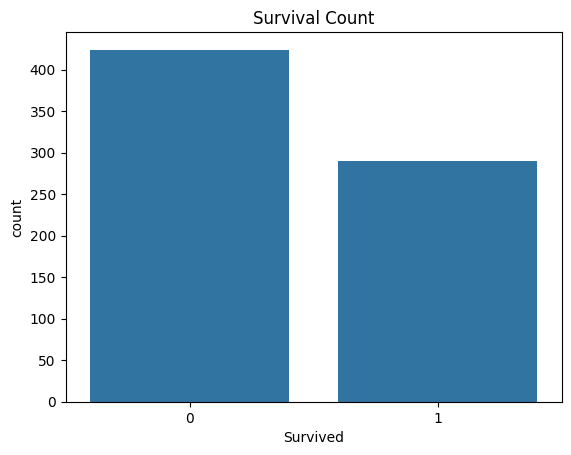

In [8]:
#8.Countplot
sns.countplot(x='Survived',data=df)
plt.title("Survival Count")
plt.show()

In [9]:
#9. Grouped Insights
print(df.groupby(['Pclass'])['Survived'].mean())
print(df.groupby(['Sex'])['Survived'].mean())

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64
Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64


In [10]:
#10. Interactive Plot (Plotly)
fig = px.histogram(df, x="Age", color="Survived", barmode='overlay')
fig.update_layout(title="Survival by Age", bargap=0.1)
fig.show()

Visualized data using:
  - Histograms
  - Boxplots
  - Heatmaps
  - Countplots